In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import cv2

In [19]:
def load_video_to_numpy(video_path, convert_to_rgb=False):
    """
    Load video file into a numpy array of shape (num_frames, height, width, channels).
    
    Args:
        video_path (str): Path to the video file (.avi, .mp4, etc.)
        convert_to_rgb (bool): If True, convert frames from BGR to RGB.
        
    Returns:
        np.ndarray: Video frames as numpy array (num_frames, height, width, 3)
    """
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        raise IOError(f"Could not open video file: {video_path}")

    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width      = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height     = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video_array = np.empty((num_frames, height, width, 3), dtype=np.uint8)

    frame_idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if convert_to_rgb:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        video_array[frame_idx] = frame
        frame_idx += 1

    cap.release()

    # Trim in case fewer frames were read
    video_array = video_array[:frame_idx]

    return video_array


In [23]:
example_file = 'ODA_Dataset-master/dataset/3/dvs.csv'
example_camera = 'ODA_Dataset-master/dataset/3/3.avi'
example_radar = 'ODA_Dataset-master/dataset/3/radar.csv'

dvs_df = pd.read_csv(example_file)
raw_video = load_video_to_numpy(example_camera, convert_to_rgb=True)
radar_df = pd.read_csv(example_radar)

In [24]:
radar_df

time [ns]
0.000000e+00 -0.404743  3.050788   12.231153  7.666759  -18.868628 -42.335297 -42.722107 -16.857199  11.818553  20.766830  3.050788  -11.699690 -19.745403 -12.421741  8.827198   21.205219  11.560678 -4.994925  -8.656757   0.162583   5.681118  -6.361666  -24.180862 -27.249580 -7.676830   7.176795   9.652399  -11.957565 -30.137785 -35.630531 -19.074928  11.509103  24.144999  19.064854  3.721264  -1.513607   1.477748   5.655330   0.626759  -17.269800 -28.229506 -12.808555  7.873059   12.643755  9.549250  -1.823058  -13.659544 -21.885771 -12.911705 -4.247087  -3.370310  -10.565035 -2.596684   10.477601  24.222363  20.354231 -1.590970  -16.857199 -9.739834   9.987638   22.236721  20.483168  7.744121   0.807272  -7.470530  -6.645329  -7.496317  -14.175295 -24.309799 -18.584965 -2.364596   5.629542   6.841557  -9.095145  -13.143793 -5.020713   12.437454  25.846977  22.675110  0.961997  -19.539104 -12.782767  9.085073   31.855482  16.924486 -15.129434 -36.429947 -24.567675 -4.943351   7.563608  -4.556538  -6.387453   6.893132   17.827051  26.027491  21.231007  13.701044 -0.198442  -13.582181 -2.931922   12.721117  16.176649  8.569323   2.148224   10.374451  21.901484  21.669395  4.443316  -17.579250 -19.693829 -5.381739   1.606686  -1.281519  -3.009285  -5.046501   2.277162   23.912912  29.947203  20.534742 -11.158152 -32.329727 -14.123719  19.296942  31.829695  25.666464  16.408735  14.655183  13.933132 -0.305622  3.253059   12.485000  8.333205  -18.021667 -42.081448 -43.422401 -17.402767  11.814524  20.969103  3.588297  -11.265331 -19.156321 -12.142108  8.720018   21.226978  11.814524 -4.998955  -8.557636   0.158554   5.651301  -5.669431  -23.823866 -27.588846 -8.299761   6.811740   9.648370  -11.342694 -30.038664 -35.944012 -20.033096  10.886172  23.805733  19.370274  4.181411  -1.362911   1.164268   5.470788   0.493792  -17.170679 -28.800861 -13.483060  7.843242   13.310202  10.525146 -1.233974  -13.869873 -22.070312 -13.018885 -3.941666  -2.678076  -10.182251 -2.626501   10.138333  24.373058  20.711227 -0.872948  -16.500202 -10.001739  9.932034   22.181116  20.711227  8.075330   1.164268  -7.371409  -6.726720  -7.629284  -14.591925 -24.597492 -18.898445 -2.678076   5.445001   6.399139  -8.738149  -13.483060 -6.056244   11.530861  25.249834  23.057894  1.937894  -19.078957 -13.276760  8.101117   31.103613  16.843096 -14.824013 -36.485550 -25.190605 -5.127892   8.152693  -3.941666  -6.571995   5.857601   17.023607  25.714010  21.742729  14.341703  0.416429  -13.689361 -3.193827   12.562363  16.636795  9.055257   2.582583   10.628297  22.645292  22.438992  5.032400  -18.099031 -21.399836 -6.984596   1.112693  -0.769798  -2.445988  -4.689505   2.608371   23.651007  29.736874  20.504927 -11.626357 -32.514271 -14.230899  19.782875  32.470352  26.126612  16.507856  14.032252  12.974963 -0.266135  2.905733   12.318187  9.094744  -16.770166 -41.655148 -44.027603 -19.168407  10.306758  20.518625  3.885660  -10.735878 -18.755808 -12.489434  8.450055   20.879652  11.544560 -4.985255  -9.214413  -0.111410   5.742363  -5.397856  -23.758591 -28.477711 -9.446501   6.748077   10.100458 -10.890603 -30.179689 -36.858665 -20.638298  10.616209  24.670420  20.260750  4.788224  -1.452362   0.765367   5.278187   0.997455  -16.899103 -29.199762 -13.546723  7.934304   13.633351  10.564633 -0.627160  -13.546723 -22.778664 -14.139836 -4.650017  -2.561226  -10.194340 -3.154340   9.610495   23.767857  21.395403  0.533279  -15.145551 -9.652801   9.533132   22.297966  21.498552  9.120531   1.538993  -7.228772  -6.558296  -7.486647  -14.191412 -24.893242 -19.993608 -3.180127   6.026026   7.624854  -8.492361  -13.572511 -6.635658   11.131960  25.211960  23.716282  3.086246  -18.265844 -13.211485  7.831154   30.678925  17.372545 -14.449287 -36.832878 -26.208408 -5.501006   8.475842  -3.721666  -6.816171   5.278187   16.160530  25.160383  21.962729  14.974304  1.074818  -12.953609 -3.257490   12.189249  16.237894  9.017381   2.467345   10.796721  22.96844

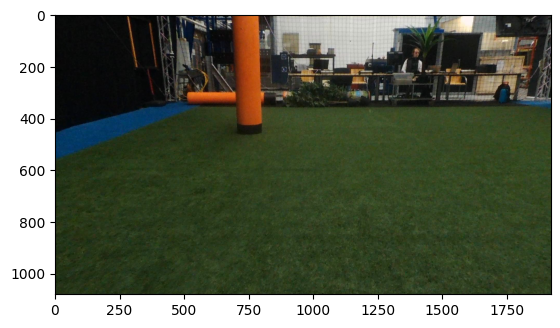

In [22]:
plt.imshow(raw_video[0, :])